# Exemples AD (avec kernel Python) 
<font color="red"> Version Elèves (DM 24-25) **Binéarisée** </font>

## AD avec données météo (catégorielles)

- <font size=4> Expliquer la binéarisation</font>
- La binéarisation réalisée ici à l'aide de **get_dummies()** de Pandas remplace les données énumérées (catégorielles).
- L'inconvénient des transcodages divers : on se retrouve avec un test "outlook <= .5". !!   
Voir plus bas.

In [1]:
# Les libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np

In [2]:
### Pour tout afficher (san sprint)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### A propos du fichier weather-nominal de weka 
(dont seul les attributs du format _arff_ sont rappelés ci-dessous)

A partir des infos ci-dessus, on a les données catégorielles qu'il faudra encoder pour notre BD weather:

### Lecture des données

In [3]:
col_names = ['outlook', 'temperature', 'humidity', 'windy', 'play']
df = pd.read_csv("weather.csv") # Eventuellement ,  encoding="utf-16")  
# par défaut : header = 'infer' (il prend la 1e ligne comme header)
# voir aussi true_values=None, false_values=None, (pour la conversion de la col windy)
# le paramètre usecols= ['outlook', 'temperature', 'humidity', 'windy', 'play'] peut être donné.
df

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [4]:
# get_dummies appliqué à qq cols (on laisse la col play yes/non)
# Attention : le résultat place la colonne "play" au début ! 
df_encode= pd.get_dummies(df, columns=["outlook","temperature","humidity","windy"])
df_encode

,play,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,windy_False,windy_True
0,no,False,False,True,False,True,False,True,False,True,False
1,no,False,False,True,False,True,False,True,False,False,True
2,yes,True,False,False,False,True,False,True,False,True,False
3,yes,False,True,False,False,False,True,True,False,True,False
4,yes,False,True,False,True,False,False,False,True,True,False
5,no,False,True,False,True,False,False,False,True,False,True
6,yes,True,False,False,True,False,False,False,True,False,True
7,no,False,False,True,False,False,True,True,False,True,False
8,yes,False,False,True,True,False,False,False,True,True,False
9,yes,False,True,False,False,False,True,False,True,True,False


In [5]:
# 2 première lignes du dataframe d'origine
df.head(2)

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no


In [6]:
df.shape  # les dimensions (15 lignes et 5 cols)

(14, 5)

In [7]:
# Les colonnes : de 2 façons
df.columns  
# OU
df.columns.values

Index(['outlook', 'temperature', 'humidity', 'windy', 'play'], dtype='object')

array(['outlook', 'temperature', 'humidity', 'windy', 'play'],
      dtype=object)

In [8]:
# On a besoin des noms des colonnes sous forme d'une liste (pour les manips éventuelles)
list(df.columns.values)

['outlook', 'temperature', 'humidity', 'windy', 'play']

In [9]:
df_encode.head(2)

,play,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,windy_False,windy_True
0,no,False,False,True,False,True,False,True,False,True,False
1,no,False,False,True,False,True,False,True,False,False,True


In [10]:
list(df_encode.columns.values)

['play',
 'outlook_overcast',
 'outlook_rainy',
 'outlook_sunny',
 'temperature_cool',
 'temperature_hot',
 'temperature_mild',
 'humidity_high',
 'humidity_normal',
 'windy_False',
 'windy_True']

In [11]:
df_encode.shape

(14, 11)

#### 0n a donc 11 colonnes (au lieu de 5 au départ).

In [12]:
# On transforme play en booléen. Il 'y a pas d'oblgation
df_encode1=df_encode.replace({"play": {"yes": True, "no": False}})
df_encode1

C:\Users\paull\AppData\Local\Temp\ipykernel_580\1481316691.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encode1=df_encode.replace({"play": {"yes": True, "no": False}})


,play,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,windy_False,windy_True
0,False,False,False,True,False,True,False,True,False,True,False
1,False,False,False,True,False,True,False,True,False,False,True
2,True,True,False,False,False,True,False,True,False,True,False
3,True,False,True,False,False,False,True,True,False,True,False
4,True,False,True,False,True,False,False,False,True,True,False
5,False,False,True,False,True,False,False,False,True,False,True
6,True,True,False,False,True,False,False,False,True,False,True
7,False,False,False,True,False,False,True,True,False,True,False
8,True,False,False,True,True,False,False,False,True,True,False
9,True,False,True,False,False,False,True,False,True,True,False


### On a donc maintenant un data frame numérique.  
On va désigner la colonne décision (les autres : var explicatives).

In [13]:
col_names=list(df_encode1.columns)
col_names

['play',
 'outlook_overcast',
 'outlook_rainy',
 'outlook_sunny',
 'temperature_cool',
 'temperature_hot',
 'temperature_mild',
 'humidity_high',
 'humidity_normal',
 'windy_False',
 'windy_True']

#### la colonne 'play' est placée au début.
Pour la mettre à la fin, on reindexe :

In [14]:
new_col_names = ['outlook_overcast', 'outlook_rainy', 'outlook_sunny', 'temperature_cool',
             'temperature_hot', 'temperature_mild', 'humidity_high', 'humidity_normal',
             'windy_False', 'windy_True','play']
df_encode2=df_encode1.reindex(columns=new_col_names)
df_encode2

,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,windy_False,windy_True,play
0,False,False,True,False,True,False,True,False,True,False,False
1,False,False,True,False,True,False,True,False,False,True,False
2,True,False,False,False,True,False,True,False,True,False,True
3,False,True,False,False,False,True,True,False,True,False,True
4,False,True,False,True,False,False,False,True,True,False,True
5,False,True,False,True,False,False,False,True,False,True,False
6,True,False,False,True,False,False,False,True,False,True,True
7,False,False,True,False,False,True,True,False,True,False,False
8,False,False,True,True,False,False,False,True,True,False,True
9,False,True,False,False,False,True,False,True,True,False,True


###  Travaillons avec df_encode1 (avec play au début)

In [15]:
# Puisque 'play' est au début
feature_cols = col_names[1:] # play est  en tête  
print(feature_cols)
X = df_encode[feature_cols] # Features
y = df_encode.play # Target variable
X, y

['outlook_overcast', 'outlook_rainy', 'outlook_sunny', 'temperature_cool', 'temperature_hot', 'temperature_mild', 'humidity_high', 'humidity_normal', 'windy_False', 'windy_True']


(    outlook_overcast  outlook_rainy  outlook_sunny  temperature_cool  \
 0              False          False           True             False   
 1              False          False           True             False   
 2               True          False          False             False   
 3              False           True          False             False   
 4              False           True          False              True   
 5              False           True          False              True   
 6               True          False          False              True   
 7              False          False           True             False   
 8              False          False           True              True   
 9              False           True          False             False   
 10             False          False           True             False   
 11              True          False          False             False   
 12              True          False          False

In [16]:
list(df_encode.loc[1]) # utilitaire : les cols de la 2e ligne !

['no',
 np.False_,
 np.False_,
 np.True_,
 np.False_,
 np.True_,
 np.False_,
 np.True_,
 np.False_,
 np.False_,
 np.True_]

In [17]:
# Diviser le dataset en training set et test set : 80% et 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test
X_test.head()
y_test.values

# qq traces
#X["outlook"].values
#X_test["temperature"].values

,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,windy_False,windy_True
3,False,True,False,False,False,True,True,False,True,False
7,False,False,True,False,False,True,True,False,True,False
6,True,False,False,True,False,False,False,True,False,True


array(['yes', 'no', 'yes'], dtype=object)

## Création de l'arbre de décision

Gini (regression Tree) : clf_gini = DecisionTreeClassifier()      #PAR DEFAUT : GINI  
ou    
clf_entropy = DecisionTreeClassifier(criterion = "entropy")
 
d'autres valeurs / parmas : 
clf_entropy = DecisionTreeClassifier(
                    criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
 
et au plus complet (voir class_weight ci-dessous) :
 
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
           max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')

In [18]:
# Gini (regression Tree)
clf_gini = DecisionTreeClassifier()      #PAR DEFAUT : GINI
# ou 
clf_entropy = DecisionTreeClassifier(criterion = "entropy")
 
# d'autres valeurs / parmas : 
# clf_entropy = DecisionTreeClassifier(
#                     criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
 
# Le plus complet (voir class_weight ci-dessous) :
# ----------------------------------------------- 
# DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
#            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
#            min_samples_split=2, min_weight_fraction_leaf=0.0,
#            presort=False, random_state=100, splitter='best')
 

# entrainer :  Decision Tree Classifer
clf_shanon = clf_entropy.fit(X_train,y_train)

#Prédiction des reponses pour test set
y_pred_shanon = clf_shanon.predict(X_test)
"les prédiction de l'ensemble de test", y_pred_shanon

# on a dans test :
print("*** X_test \n", X_test)
print("*** ET les y_test :", y_test.values) # On ne veut pas les No des instances
print('---------------------')

print("Pred labels :", y_pred_shanon)
 
# ======Le rapport ======
from sklearn.metrics import classification_report
print("\n\nClassification report - \n", classification_report(y_test,y_pred_shanon))

("les prédiction de l'ensemble de test",
 array(['no', 'no', 'yes'], dtype=object))

*** X_test 
    outlook_overcast  outlook_rainy  outlook_sunny  temperature_cool  \
3             False           True          False             False   
7             False          False           True             False   
6              True          False          False              True   

   temperature_hot  temperature_mild  humidity_high  humidity_normal  \
3            False              True           True            False   
7            False              True           True            False   
6            False             False          False             True   

   windy_False  windy_True  
3         True       False  
7         True       False  
6        False        True  
*** ET les y_test : ['yes' 'no' 'yes']
---------------------
Pred labels : ['no' 'no' 'yes']


Classification report - 
               precision    recall  f1-score   support

          no       0.50      1.00      0.67         1
         yes       1.00      0.50      0.67         2

    accuracy

In [19]:
y_test

3    yes
7     no
6    yes
Name: play, dtype: object

### A propos des mesures (extrait de la doc) :
**Precision, recall, F-measure** and **support** for each class.

The **precision** is the ratio _tp / (tp + fp)_ where **tp** = true positives and **fp** = false positives.    
<font color="red"> The precision is intuitively the ability of the classifier not to label a negative sample as positive.</font>

The **recall** is the ratio _tp / (tp + fn)_ where **tp** = true positives and **fn** =  false negatives.    
<font color="red"> The recall is intuitively the ability of the classifier to find all the positive samples.</font>

The **F-beta score** can be interpreted as a weighted harmonic mean of the _precision and recall_, where an **F-beta score** reaches its best value at 1 and worst score at 0.

The **F-beta score** weights _recall_ "more than" _precision_ by a factor of _beta_. beta == 1.0 means recall and precision are equally important.

The **support** is the number of occurrences of each class in _y_true_ (i.e. the décision as it is in the DB = ground truth).

If **pos_label** is None and in binary classification, this function returns the average precision, recall and F-measure if average is one of 'micro', 'macro', 'weighted' or 'samples'.



## Dessinons des arbres de décision

In [20]:
# Si besoin d'installer ces packages.
if False :
    !pip install pydotplus
    !pip install graphviz

True

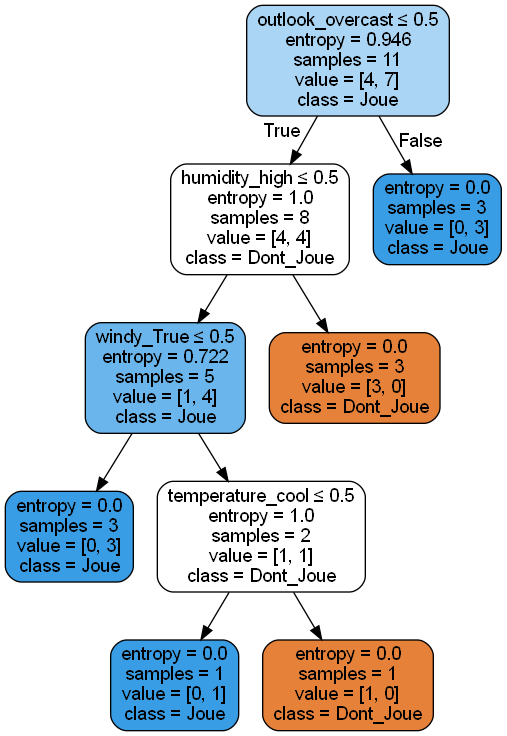

In [21]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

# ZZ : nous avions les valeurs svtes pour la classe :
#print(l_encodeur.transform(["no", "yes"])) # donne [ 6 11]

dot_data = StringIO()
export_graphviz(clf_shanon, out_file=dot_data,  
            filled=True, rounded=True,
            special_characters=True,feature_names = feature_cols, class_names=['Dont_Joue', 'Joue'])
            #special_characters=True,feature_names = feature_cols, class_names=['Joue', 'Dont_Joue'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue().replace("\n",""))  
graph.write_png('meteo-entropy.png')
Image(graph.create_png())


### NB   
Quand on fait 70% et 30% : les résultats (l'arbre) peuvent changer   

### Evaluation

In [22]:
# Model Accuracy, how often is the classifier correct?
print(y_test)
print('=====================')
print(y_pred_shanon)
print("Accuracy Shanon:",metrics.accuracy_score(y_test, y_pred_shanon))

3    yes
7     no
6    yes
Name: play, dtype: object
['no' 'no' 'yes']
Accuracy Shanon: 0.6666666666666666


### Matrice de confusion

Text(0.5, 1.0, 'Confusion matrix, without normalization')

Confusion matrix, without normalization
[[1 0]
 [1 1]]


Text(0.5, 1.0, 'Normalized confusion matrix')

Normalized confusion matrix
[[1.  0. ]
 [0.5 0.5]]


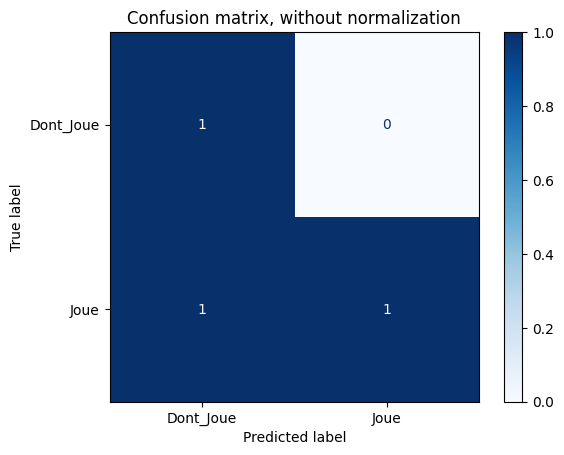

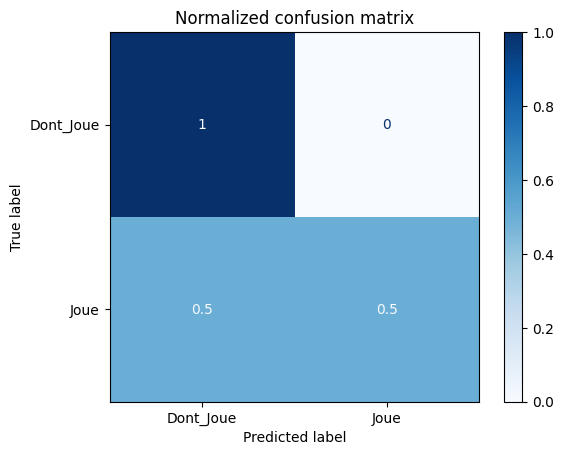

In [23]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

classifier = clf_shanon # svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)
class_names = ['Dont_Joue', 'Joue']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        #normalize=None,
        # Si on laisse comme ci-dessous, la matrice est normalisée ?
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#### A propos de la normalisation : 
(extrait de la doc)      
Ce type de normalisation peut être intéressant en cas de déséquilibre dans la distribution de la "classe" (décision). Elle permet  d'avoir une interprétation plus visuelle montrant quelle "classe" est mal prédite. 

Le terme "normalisé" signifie que chacun de ces regroupements est représenté comme ayant 1 seule échantillons. Ainsi, la somme de chaque ligne dans une matrice de confusion équilibrée et normalisée est de 1, car chaque somme de ligne représente 100 % des éléments dans un topic / cluster ou une "classe" particulière.

#### Une autre manière d'obtenir la matrice de confusion normalisé (avec seaborn)
normalize : {'true', 'pred', 'all'}, default=None       
- true : la BD
- pred : la prédiction
- all : les deux
- None : rien

Enlever "normalize='pred'" par défaut None pour avoir la même matrice que ci-dessus.

<Axes: >

Text(95.72222222222221, 0.5, 'Actual')

Text(0.5, 80.7222222222222, 'Predicted')

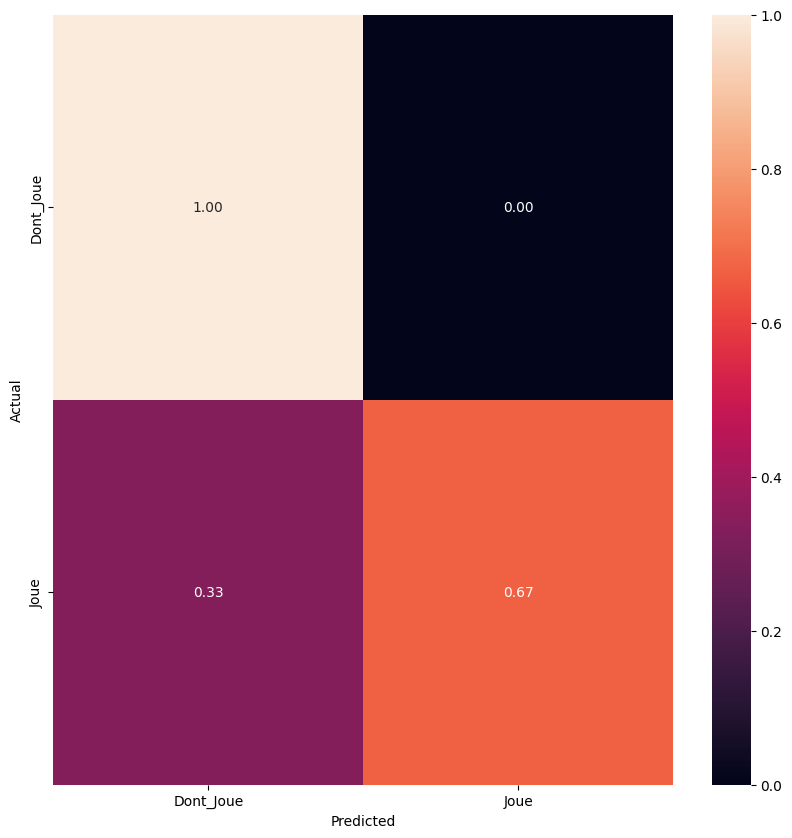

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_shanon,  normalize='pred')  
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

### Comparons avec Gini (CART)

True

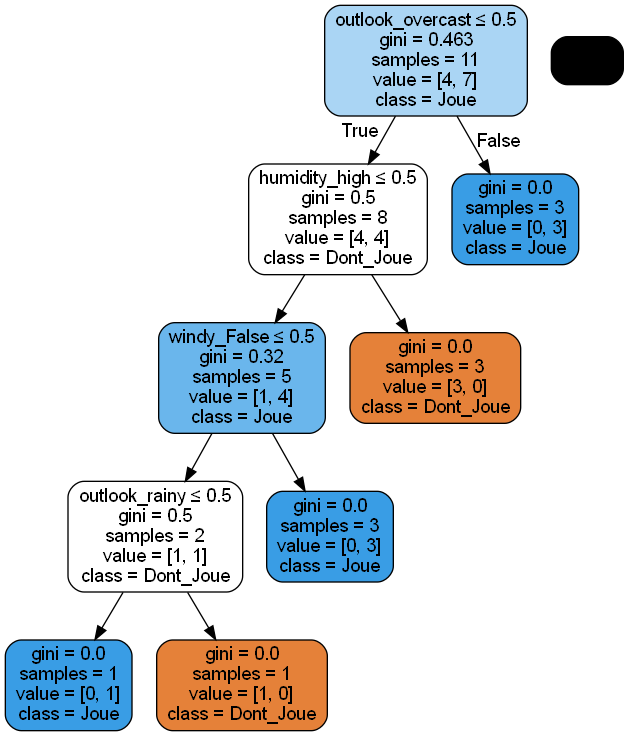

In [25]:
# Pour comparer, je fais aussi Gini
clf_gini = DecisionTreeClassifier() #PAR DEFAUT : GINI

# Train Decision Tree Classifer
clf_gini = clf_gini.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_gini = clf_gini.predict(X_test)

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols, class_names=['Dont_Joue','Joue'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('meteo_gini.png')
Image(graph.create_png())


### Evaluation de Gini (CART)

In [26]:
print("Accuracy Gini:",metrics.accuracy_score(y_test, y_pred_gini))

Accuracy Gini: 0.6666666666666666


---